# 02 Exploratory Data Analysis

This notebook explores the cleaned and processed datasets to uncover relationships and patterns.

In [6]:
# Imports and path setup
import sys
from pathlib import Path
project_root = Path('/home/sayda/update')
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.config import PROCESSED_DATA_DIR

In [7]:
# Load processed features
features_path = PROCESSED_DATA_DIR / "features.csv"
df = pd.read_csv(features_path, parse_dates=["date"])

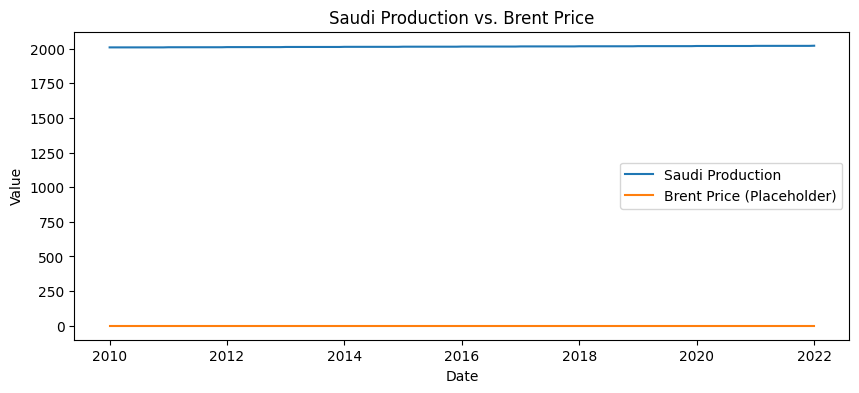

In [8]:
# Plot Saudi production and placeholder Brent price
plt.figure(figsize=(10,4))
plt.plot(df["date"], df["saudi_production"], label="Saudi Production")
plt.plot(df["date"], df["brent_price"], label="Brent Price (Placeholder)")
plt.title("Saudi Production vs. Brent Price")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

In [9]:
# Correlation matrix of key variables
cols = ['saudi_production', 'brent_price'] + [c for c in df.columns if c.startswith('renewables_value')][:1] + [c for c in df.columns if c.startswith('world_obs_value')][:1]
subset = df[cols]
corr = subset.corr()

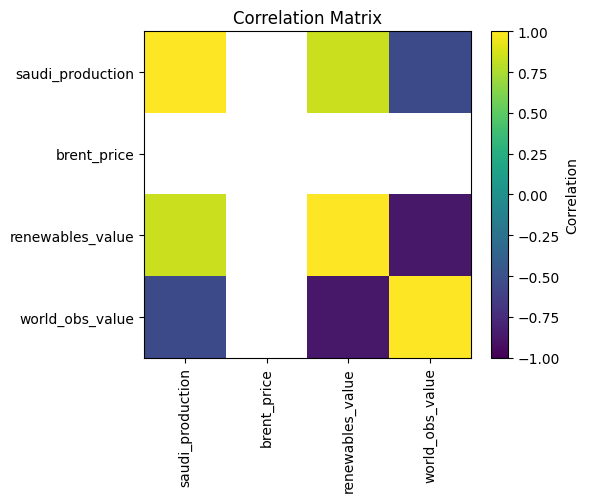

In [10]:
# Visualize correlation matrix
plt.figure(figsize=(6,5))
plt.imshow(corr, vmin=-1, vmax=1)
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.colorbar(label='Correlation')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()